# Fonte
* Modelos de gráficos
* https://app.flourish.studio/templates

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Leia a planilha Excel e selecione a aba "Table_Exp"
file_path = '/content/drive/MyDrive/2024_2/config_FT_vistas_121124.xlsx'  # Substitua pelo caminho correto do arquivo
df = pd.read_excel(file_path, sheet_name='Table_Exp')

In [4]:
df.head()

,id_test,nm_model,k,val_loss,val_acc,test_loss,test_accuracy,precision,recall,fscore,kappa,start_time,end_time,duration,best_epoch,algorithm
0,0,DenseNet201,1,0.049970,0.983,0.061274,0.989,0.989,0.989,0.989,0.986,0 days 00:14:20,2024-11-15 19:45:30,0 days 00:14:20,12,FT_DFT_K10_xlsx.py
1,0,DenseNet201,2,0.034701,0.995,0.059318,0.983,0.984,0.983,0.983,0.979,0 days 00:10:04,2024-11-15 19:55:48,0 days 00:10:04,6,FT_DFT_K10_xlsx.py
2,0,DenseNet201,3,0.025374,0.991,0.060332,0.972,0.973,0.972,0.972,0.965,0 days 00:15:15,2024-11-15 20:11:16,0 days 00:15:15,15,FT_DFT_K10_xlsx.py
3,0,DenseNet201,4,0.043900,0.986,0.076123,0.978,0.980,0.978,0.977,0.972,0 days 00:10:35,2024-11-15 20:22:05,0 days 00:10:35,7,FT_DFT_K10_xlsx.py
4,0,DenseNet201,5,0.037419,0.991,0.036955,0.989,0.989,0.989,0.989,0.986,0 days 00:18:41,2024-11-15 20:41:00,0 days 00:18:41,21,FT_DFT_K10_xlsx.py


In [5]:
# Calcular a média das métricas por modelo
metrics = ['val_acc', 'test_accuracy', 'precision', 'recall', 'fscore', 'kappa']
df_grouped = df.groupby('nm_model')[metrics].mean().reset_index()

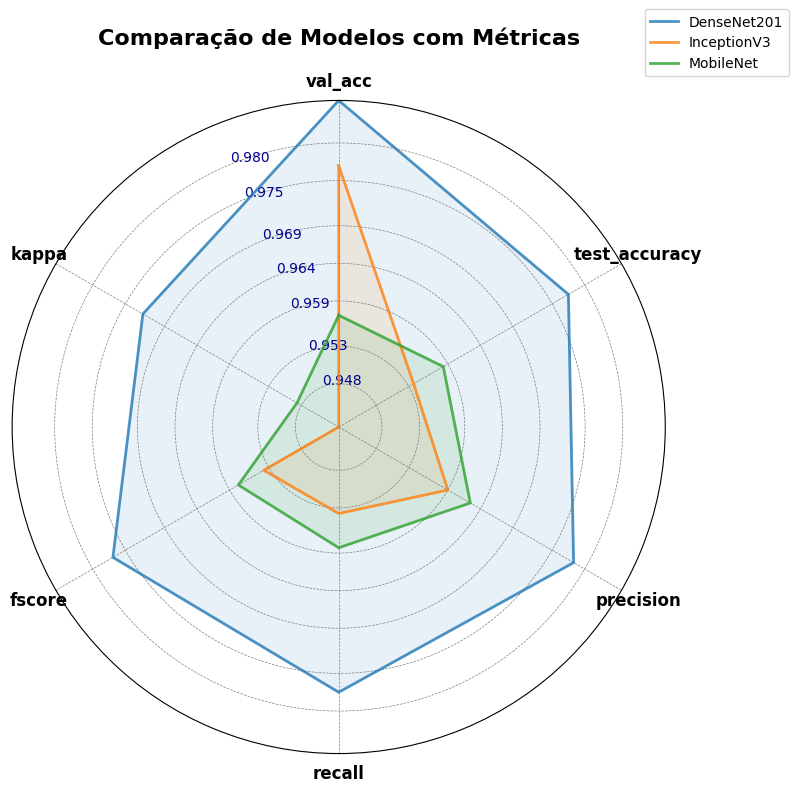

In [6]:
from math import pi
import matplotlib.pyplot as plt

# Preparar os dados para o gráfico de radar
categories = metrics
num_vars = len(categories)

# Calcular os ângulos para cada métrica
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Fechar o círculo

# Determinar o intervalo de valores automaticamente
min_val = df_grouped[categories].min().min()
max_val = df_grouped[categories].max().max()

# Ajustar limites para garantir visibilidade (valores de 0.8 a 1.0)
min_val = max(0.8, min_val)
max_val = min(1.0, max_val)
step = (max_val - min_val) / 8  # Intervalo refinado

# Iniciar o plot com estilo polar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Adicionar cada modelo ao gráfico
for i, row in df_grouped.iterrows():
    values = row[categories].tolist()
    values += values[:1]  # Fechar o círculo
    ax.plot(angles, values, label=row['nm_model'], linewidth=2, alpha=0.8)
    ax.fill(angles, values, alpha=0.1)

# Configuração do eixo angular (θ)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Adicionar rótulos para cada métrica
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')

# Configuração do eixo radial (r) ajustado
ax.set_rlabel_position(-22.5)
yticks = [round(min_val + i * step, 3) for i in range(9)]
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y:.3f}" for y in yticks], fontsize=10, color='darkblue')
ax.set_ylim(min_val, max_val)

# Melhorar a aparência das grades
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Adicionar legenda com ajuste automático de posição
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.15), fontsize=10)

# Título do gráfico
plt.title("Comparação de Modelos com Métricas", size=16, pad=20, fontweight='bold')

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()




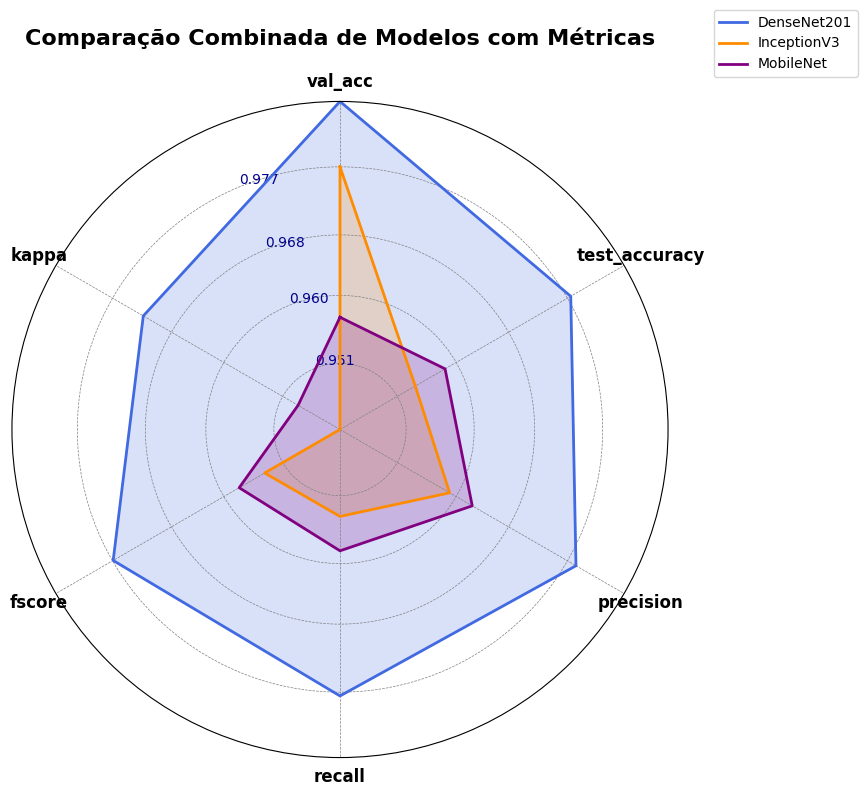

In [7]:
from math import pi
import matplotlib.pyplot as plt

# Configurar cores para os modelos
colors = ['royalblue', 'darkorange', 'purple', 'crimson', 'green']

# Preparar os dados para o gráfico de radar
categories = metrics
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Fechar o círculo

# Definir limites para o gráfico (valores entre 0.8 e 1.0)
min_val = max(0.8, df_grouped[categories].min().min())
max_val = min(1.0, df_grouped[categories].max().max())
step = (max_val - min_val) / 5

# Iniciar o gráfico de radar
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Adicionar cada modelo ao gráfico
for idx, (i, row) in enumerate(df_grouped.iterrows()):
    values = row[categories].tolist()
    values += values[:1]  # Fechar o círculo
    ax.plot(angles, values, label=row['nm_model'], color=colors[idx % len(colors)], linewidth=2)
    ax.fill(angles, values, color=colors[idx % len(colors)], alpha=0.2)

# Configurações do eixo angular (θ)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')

# Configuração do eixo radial (r)
ax.set_rlabel_position(-22.5)
yticks = [round(min_val + i * step, 3) for i in range(6)]
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y:.3f}" for y in yticks], fontsize=10, color='darkblue')
ax.set_ylim(min_val, max_val)

# Adicionar grades e melhorar contraste
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Legenda e título
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.15), fontsize=10)
plt.title("Comparação Combinada de Modelos com Métricas", size=16, pad=20, fontweight='bold')

# Ajustar layout e exibir
plt.tight_layout()
plt.show()
